<a href="https://colab.research.google.com/gist/Santiago-Valencia/cd314deec616202e4cbe1ca81708e146/0_neural_network_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

#**DATA SET**

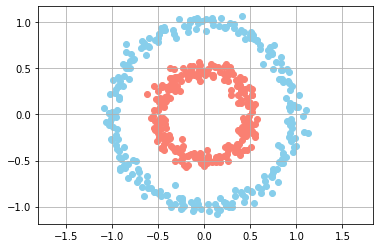

In [2]:
# CREAR EL DATASET
n = 500     #Número de registro de los datos
p = 2       #Características sobre el registro
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

plt.scatter(X[Y==0,0], X[Y==0,1], c="skyblue")
plt.scatter(X[Y==1,0], X[Y==1,1], c="salmon")
plt.axis("equal")
plt.grid(True)

plt.show()

Y = Y.reshape(500,1)

#**CLASE DE LA CAPA DE LA RED**

---

"neural_layer" permite crear una clase en la cual se crean matrices de bias ($b_{i}$) y matrices de pesos ($w_{j,i}$)con valores aleatorios entre -1 y 1. Donde ${i}$ representa el numero de neuronas (n_neur) de una capa ${L}$ y ${j}$ representa el numero de nodos previos (n_conn).






In [3]:

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)     *2 -1
    self.w = np.random.rand(n_conn, n_neur)*2 -1

#**FUNCIÓN DE ACTIVACIÓN SIGMOIDE**

---

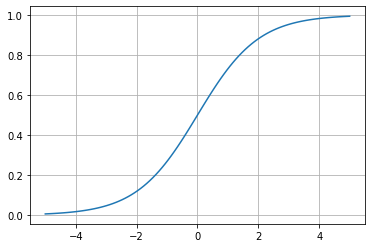

In [4]:
#FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e**(-x)),
        lambda x: x*(1-x))


_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))
plt.grid(True)

plt.show()

#**FUNCIÓN DE CREACIÓN DE LA RED NEURONAL (ARQUITECTURA COMO TENSOR)**

---



In [5]:
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  # print(nn[0].w)

  return nn

# topology = [p, 4, 8, 16, 8, 4, 1]
# neural_net = create_nn(topology, sigm)

#**FUNCION DE COSTE O ERROR**

In [6]:
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2),
           lambda Yp, Yr: (Yp - Yr))

#**FUNCION DE ENTRENAMIENTO**

In [7]:
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  # Forward pass:
  # Se evalua desde la primera capa hasta la ultima los valores
  # de entrada a cada capa encontrar las salidas de cada capa.
  # Existen l + 1 salidas de l capas en la red neuronal (neural_net).

  out = [(None, X)]

  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  # El "forward pass" puede ser usado tanto para entrenar a la red 
  # como para predecir un valor dado, por lo que "train=True" permite
  # entrenar a la red ejecutando el resto del codigo.

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):
    
      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) -1:
        #Calcular delta última capa

        deltas.insert(0, l2_cost[1](a, Y)*neural_net[l].act_f[1](a))
      else:
        #Calcular delta capa previa

        deltas.insert(0, deltas[0]@neural_net[l+1].w.T * neural_net[l].act_f[1](a))

      _w = neural_net[l]
      #Gradient descent
      neural_net[l].b = neural_net[l].b - lr*np.mean(deltas[0], axis=0, keepdims=True)
      neural_net[l].w = neural_net[l].w - lr* out[l][1].T@deltas[0]

      # print('out = ', out[l][1].T.shape)
      # print('delta =', deltas[0].shape)
      # print(out[l][1].T@deltas[0])
      # print('')
  return out[-1][1]


In [8]:
# topology=[p, 4, 8, 1]
# neural_n = create_nn(topology, sigm)
# train(neural_n, X, Y, l2_cost, lr=0.01);

#**MODELO**

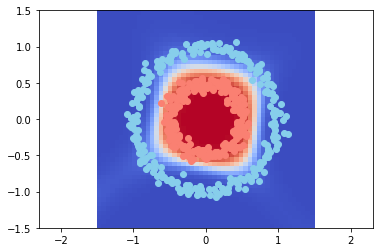

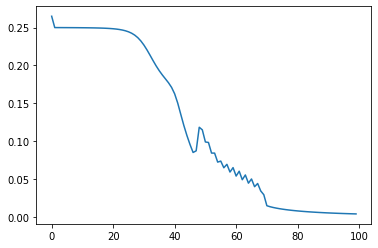

In [9]:
topology=[p, 4, 8, 1]

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):

  pY = train(neural_n, X, Y, l2_cost, lr=0.01)

  if i % 25 == 0:

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c='skyblue')
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)